 # 5.**Analyse de données : prédiction**#

On cherche désormais à prédire le taux de réussite au bac en fonction des valeurs covariables retenues. Si un nouveau lycée venait à être créé, on pourrait donc prédire son taux de réussite au bac en se basant sur les indicateurs étudiés. Dans la section précédente, on a déjà établi les déterminants de la réussite au bac. Cette partie, imposée par les consignes, est donc un peu artificielle au regard de la problématique considérée. On a néanmoins passé en revue trois modèles de prédiction différents (la régression linéaire, la régression Ridge, et le modèle de Gradient Boosting). 

## 5.1 Prédiction par régression linéaire##

On a déjà réalisé des régressions linéaires dans la section précédente. Cependant, on cherche ici à prédire la variable d'intérêt, et on va donc diviser notre base de données en un échantillon *train*, qui va nous permettre de réaliser un modèle linéaire, et un échantillon *test*, qu'on prédira à l'aide du modèle réalisé. 

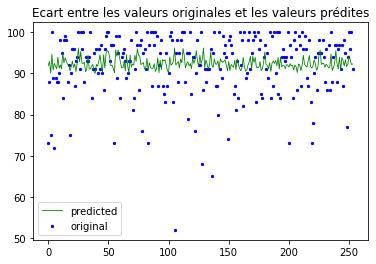

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test=train_test_split(X, Y, random_state=11, 
             test_size=0.15)
ols = LinearRegression().fit(x_train, y_train)
y_pred = ols.predict(x_test)
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="green", label="predicted")
plt.legend()
plt.title('Ecart entre les valeurs originales et les valeurs prédites')
plt.show()
erreur_ols = mean_squared_error(y_test,y_pred)


La MSE, ou erreur de prédiction des moindres carrées, permet de mesurer la qualité de la prédiction réalisée. On remarque ici que le modèle parvient à prédire les valeurs qui sont proches des valeurs moyennes, mais échoue à prédire les valeurs qui sont très différentes (il ne prédit aucune valeur inférieure à 90% de taux de réussite au bac.)

## 5.2 Prédiction par régression Ridge##

On décide donc d'utiliser un autre modèle de prédiction, la régression Ridge. Il s'agit d'une régression qui induit volontairement un biais, afin de moins coller aux valeurs de la base de *train*, et ainsi prédire plus facilement les valeurs de la base de *test*. On utilise ici la fonction python *RidgeCV*, qui ajuste automatiquement le paramètre qui pondère le biais, afin de minimiser l'erreur des moindres carrés. 

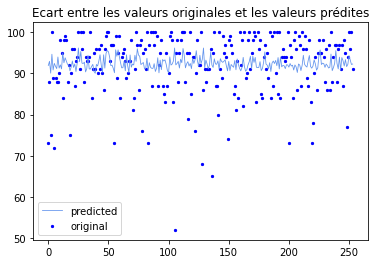

In [ ]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV()
#RidgeCV détermine par validation croisée les meilleurs paramètres pour prédire les données. 

xtrain, xtest, ytrain, ytest=train_test_split(X, Y, random_state= 11, 
             test_size=0.15)


ridge.fit(xtrain, ytrain)
ypred = ridge.predict(xtest)
erreur_ridge = mean_squared_error(ytest,ypred)

plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="cornflowerblue", label="predicted")
plt.legend()
plt.title('Ecart entre les valeurs originales et les valeurs prédites')
plt.show()

Le graphique obtenu semble très proche de ce qu'on obtenait dans le cadre d'une régression simple. La régression Ridge ne prédit pas non plus de taux de résultats du bac inférieurs à 90%. 

## 5.3 Prédiction par gradient boosting ##

On décide enfin d'utiliser un modèle de type *Gradient Boosting* pour prédire le taux de réussite au bac de chaque lycée. Il s'agit d'un outil de machine learning, qui réalise des prédictions en se basant notamment sur des arbres de décision. 

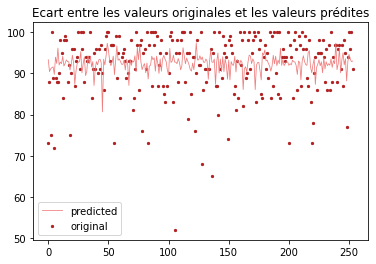

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

xtrain, xtest, ytrain, ytest=train_test_split(X, Y, random_state=11, 
             test_size=0.15)

gbr = GradientBoostingRegressor(n_estimators=600, max_depth=5, learning_rate=0.01, min_samples_split=3)
gbr.fit(xtrain, ytrain)
ypred = gbr.predict(xtest)
erreur_grad = mean_squared_error(ytest,ypred)
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="firebrick", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="lightcoral", label="predicted")
plt.legend()
plt.title('Ecart entre les valeurs originales et les valeurs prédites')
plt.show()


On remarque que le Gradient Boosting parvient à prédire davantage de valeurs, notamment en prédisant des valeurs qui s'écartent de la moyenne. La courbe des valeurs prédites semble coller davantage aux valeurs originales que les courbes de la régression linéaire et de la régression Ridge. 

## 5.4 **Comparaison des outils de prédiction utilisés**

In [ ]:
df_erreurs = pd.DataFrame({'erreurs' : ['OLS', 'Ridge', 'Gradient'], 'valeurs' : [erreur_ols, erreur_ridge, erreur_grad], 'gain comparatif' : [ "", (erreur_ols - erreur_ridge)/erreur_ols, (erreur_ols - erreur_grad)/erreur_ols] })
df_erreurs

,erreurs,valeurs,gain comparatif
0,OLS,55.181986,
1,Ridge,55.181931,9.91812e-07
2,Gradient,54.641466,0.00979523


On remarque que les différences de valeurs entre les erreurs de prédiction des moindres carrés sont minimes. Ces résultats sont cohérents avec ce que l'on a établit dans la partie 4 : la régression linéaire permet bien d'expliquer la variabilité de la variable d'intérêt. Pour diminuer encore l'erreur des moindres carrés des modèles, on aurait pu faire varier la taille de la base de *train*. Dans le cas du modèle de prédiction par *Gradient Boost*, on aurait également pu faire varier le paramètre taux d'apprentissage (*learning_rate*), ainsi que la profondeur maximale (*max_depth*). 